# Sentiment Classification


# EDA and data handling 


In [1]:
# EDA and data handling 

import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objs as go
import re
import csv

# For text handling 
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
stopwords = set(STOPWORDS)


### Read Dataset

######  the dataset contains sentences each sentence is labeled according to whether it is a positive review or negative review

In [7]:
data=pd.read_csv("./DS/IMDB Dataset.csv")

In [8]:
data.head() 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check for nulls


In [9]:
data[data.isnull().any(axis=1)].head()

,review,sentiment


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Handling categorical target variable:

#### Change the categorical variables map postive to 1 and negative to 0


In [11]:
data.sentiment=data.sentiment.apply(lambda x: 1 if x == "positive" else 0)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Check if the dataset is balanced the ratio between the number of positive reviews and negative reviews

In [12]:
temp = data.groupby('sentiment').count()['review'].reset_index().sort_values(by='review',ascending=False)
temp

,sentiment,review
0,0,25000
1,1,25000


### Splitting the dataset into two frames one for positive review and the second for negative reviews for further EDA 

In [13]:
df_neg = data[(data.sentiment==0)]
df_pos = data[(data.sentiment==1)]

df_neg.head() 

,review,sentiment
3,Basically there's a family where a little boy ...,0
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
10,Phil the Alien is one of those quirky films wh...,0
11,I saw this movie when I was about 12 when it c...,0


In [14]:
df_pos.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1


In [83]:
# only for visualising  I decided to remove few most common words since it doesn’t give any meaning 
app_words = ['people','see','br','really','made','even','make','film','films', 'movie','movies','character','characters','one', 'time']
stopwords.update(app_words)

### Visualising the most common positive words in word cloud 

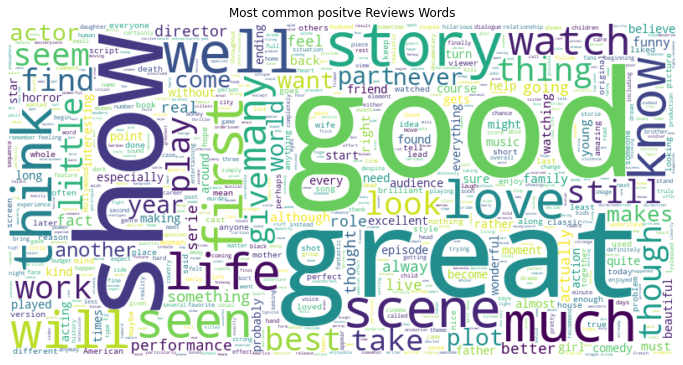

In [95]:
text = " ".join(review for review in df_pos.review)

wordcloud = WordCloud(width=800, height=400,stopwords=stopwords, background_color="white", max_words=2000,min_word_length=4).generate(text)
# visualize the image
fig=plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common positve Reviews Words')
plt.savefig('pos_word.png')
plt.show()


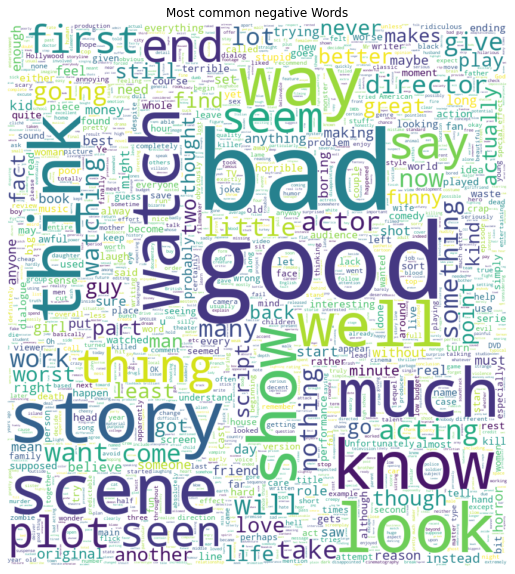

In [92]:
text = " ".join(review for review in df_neg.review)
wordcloud = WordCloud(mask=neg_mask,stopwords=stopwords, background_color="white", max_words=2000).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common negative Words')
plt.savefig('neg_word.png')
plt.show()


# Machine learning Approach :

## Text classification
the dataset contains sentences each sentence is labeled according to whether it is a positive review or a negative review. <br>
The goal is given a new sentence the models must be able to understand the text’s sentiment and classify it whether it its a positive or negative review 

### Handling text data :
Machine learning algorithms cannot work with raw text directly text must be converted into numbers Namely to vectors and Each vector represent linguistic properties of the text .
<br> The idea of converting words into vector is known as **word embedding** .

The first technique I will discuss is **Bag of Words** : <br> 
here i'll use built iin function CountVectorizer from sklearn whcih convert a collection of text documents to a matrix of token counts <br>
1- tokenise the text meaning split into smaller units<br>
2-  give unique ID for each token.<br>
3- count the occurrence of the token in each document or row 



In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# First Model is Logistic regression with Bag or Word : <br>
Logistic Regression is a binary classifier commonly used to estimate the probability that an instance belongs to a particular class if the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class,otherwise it predicts that it belong to the other class.


In [16]:
# for text data Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)

In [17]:
# logistic regression
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

In [18]:
#Quick cleaning for the text to remove punctuation or other symbols 
import re
import string
def clean(s):
    s=s.split()
    s=" ".join(s)
    s= re.sub(f'[{re.escape(string.punctuation)}]', '', s)
    return s
data.loc[:, "review"] = data.review.apply(clean)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production br br The filmin...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1


### for cross validation First Split the dataset using StratifiedKFold : <br>
first it shuffles the data, after that splits the data into n_splits

In [19]:
#kfold creat column and fill it with -1
data["kfold"]=-1
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,review,sentiment,kfold
0,Having read all of the comments on this film I...,1,-1
1,This is a comedy of morals so occasionally a g...,1,-1
2,Luc Bessons first work is also his first foray...,1,-1
3,The novel WEAPON which serves as the basis for...,0,-1
4,The amount of hype and the huge success this f...,0,-1


In [20]:
data.shape

(50000, 3)

#### Identify the target and the independent variable:

In [21]:
# save target variable
y=data.sentiment.values

# for unbalanced dataset its better to use StratifiedKFoldwhich keeps the ration constant
kf=model_selection.StratifiedKFold(n_splits=6)

s = kf.split(X=data,y=y)

#fill kfold col with which fold does the row belongs to 
for f,(t_,v_) in enumerate (s):
    data.loc[v_,'kfold']=f
    
data.head()

,review,sentiment,kfold
0,Having read all of the comments on this film I...,1,0
1,This is a comedy of morals so occasionally a g...,1,0
2,Luc Bessons first work is also his first foray...,1,0
3,The novel WEAPON which serves as the basis for...,0,0
4,The amount of hype and the huge success this f...,0,0


#### Split DS into training and test dataset


In [22]:
for fold_ in range(6):
    train_df=data[data.kfold != fold_].reset_index(drop=True)
    test_df=data[data.kfold ==fold_].reset_index(drop=True)

In [23]:
test_df.head()

,review,sentiment,kfold
0,In Lizzie Bordens Love Crimes 1992 Sean Young ...,1,5
1,The movie is truly poignant unique and uplifti...,1,5
2,This was the first directing job by Sebastian ...,1,5
3,i see hundreds of student films this is tops j...,1,5
4,Since the title is in English and IMDb lists t...,1,5


In [24]:
train_df.head()

,review,sentiment,kfold
0,Having read all of the comments on this film I...,1,0
1,This is a comedy of morals so occasionally a g...,1,0
2,Luc Bessons first work is also his first foray...,1,0
3,The novel WEAPON which serves as the basis for...,0,0
4,The amount of hype and the huge success this f...,0,0


In [25]:
test_df.shape ,train_df.shape

((8333, 3), (41667, 3))

### Bag of words
Converting text into vector using BoW

In [26]:
#first tokenize the sentences 
# second convert a collection of text documents to a matrix of token counts
count_vec=CountVectorizer(
    tokenizer=word_tokenize,
    token_pattern=None)
    
#fit on train DS
count_vec.fit(train_df.review)
    
#transform DS
xtrain=count_vec.transform(train_df.review)
xtest=count_vec.transform(test_df.review)

#### Fit the model to the transformed dataset 

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
# call model 
model=linear_model.LogisticRegression()

# Hyperparameter opaimization
grid_values={'penalty': ['l1','l2'], 
             'C': [0.001,0.01,0.1,1,10,100]}
hyper_tun =model_selection.GridSearchCV(model, param_grid = grid_values,scoring = 'accuracy' ,return_train_score=True)

# Fit the model
hyper_tun.fit(xtrain,train_df.sentiment) 

preds=hyper_tun.predict(xtest) 
accuracy=metrics.accuracy_score(test_df.sentiment ,preds)
    
print(f"Fold: {fold_}")
print(f"Accuracy: {accuracy}")
print('F1 Score : ' + str(metrics.f1_score(test_df.sentiment ,preds)))
print("")

Fold: 5
Accuracy: 0.8937957518300732
F1 Score : 0.8946303131325157



In [51]:
hyper_tun.best_params_

{'C': 0.1, 'penalty': 'l2'}

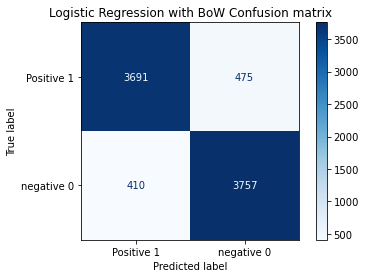

In [52]:
disp = metrics.plot_confusion_matrix(hyper_tun, xtest, test_df.sentiment,
                                 display_labels=['Positive 1', 'negative 0'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Logistic Regression with BoW Confusion matrix')
plt.savefig('CM.png')

In [53]:
from sklearn.metrics import roc_auc_score
auc=metrics.roc_auc_score(test_df.sentiment ,preds)
auc

0.8937948142257117

In [54]:
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves

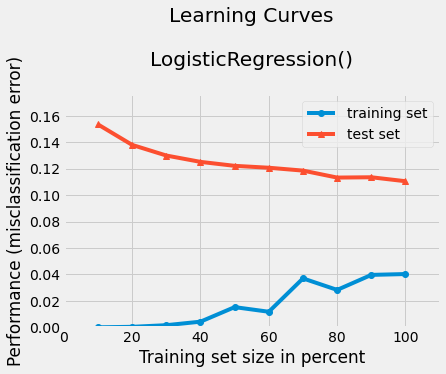

In [55]:
plot_learning_curves(xtrain, train_df.sentiment, xtest, test_df.sentiment, model)
plt.show()

# Naive bayes classifier with BoW

In [28]:
from sklearn import naive_bayes

model2=naive_bayes.MultinomialNB()

grid_values_2= { 'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

hyper_tun_2 =model_selection.GridSearchCV(model2, param_grid = grid_values_2,scoring = 'accuracy' ,return_train_score=True)

# Fit the model
hyper_tun_2.fit(xtrain,train_df.sentiment) 
preds_2 = hyper_tun_2.predict(xtest)

accuracy = metrics.accuracy_score(test_df.sentiment, preds_2)

print(f"Fold: {fold_}")
print(f"Accuracy: {accuracy}")
print('F1 Score : ' + str(metrics.f1_score(test_df.sentiment ,preds_2)))
print("")

Fold: 5
Accuracy: 0.8489139565582623
F1 Score : 0.8437771435661993



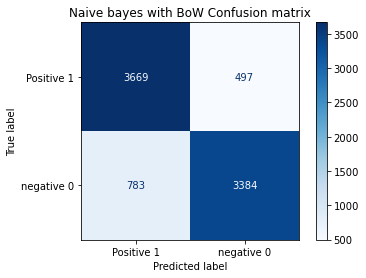

In [57]:
disp = metrics.plot_confusion_matrix(hyper_tun_2, xtest, test_df.sentiment,
                                 display_labels=['Positive 1', 'negative 0'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Naive bayes with BoW Confusion matrix')
plt.savefig('CM2.png')

In [61]:
hyper_tun_2.best_params_

{'alpha': 0.1}

# Using TFIDF instead of count vector 

# logistic regression with TF-IDF


In [58]:
# logistic regression
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

if __name__ == "__main__":

    # read dataset
    df = pd.read_csv(
        "/Users/salwaali/Desktop/BDOS/1 new/project/DS/IMDB Dataset.csv")

    # change the categorical variables map postive to 1 and negative to 0
    df.sentiment = df.sentiment.apply(
        lambda x: 1 if x == "positive" else 0)

    # kfold creat column and fill it with -1
    df["kfold"] = -1

    # randomly slecting rows or data from our dataset
    df = df.sample(frac=1).reset_index(drop=True)

    # fetch lables our target
    y = df.sentiment.values

    # for unbalanced dataset its better to use StratifiedKFoldwhich keeps the ration constant
    kf = model_selection.StratifiedKFold(n_splits=5)

    # fill kfold col
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f

    for fold_ in range(5):
        train_df = df[df.kfold != fold_].reset_index(drop=True)
        test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    
    def clean(s):
        s=s.split()
        s=" ".join(s)
        s=re.sub(f'[{re.escape(string.punctuation)}]', '', s)
        return s

    df.loc[:, "review"] = df.review.apply(clean)

    # init  tfidf_vec
    tfidf_vec=TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None)


    # fit on train DS
    tfidf_vec.fit(train_df.review)

    # transform DS
    xtrain = tfidf_vec.transform(train_df.review)
    xtest = tfidf_vec.transform(test_df.review)

    # model
    model_3 = linear_model.LogisticRegression(penalty='l2',C=0.1)
    model_3.fit(xtrain, train_df.sentiment)

    preds_3 = model_3.predict(xtest)

    accuracy = metrics.accuracy_score(test_df.sentiment, preds_3)

    print(f"Fold: {fold_}")
    print(f"Accuracy: {accuracy}")
    print('F1 Score : ' + str(metrics.f1_score(test_df.sentiment ,preds_3)))

    print("")

Fold: 4
Accuracy: 0.8544
F1 Score : 0.8567493112947658



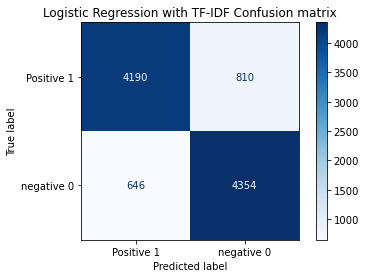

In [59]:
disp = metrics.plot_confusion_matrix(model_3, xtest, test_df.sentiment,
                                 display_labels=['Positive 1', 'negative 0'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Logistic Regression with TF-IDF Confusion matrix')
plt.savefig('CM3.png')

# Naive bayes classifier with TF-IDF

Fold: 4
Accuracy: 0.5056
F1 Score : 0.5135773317591499



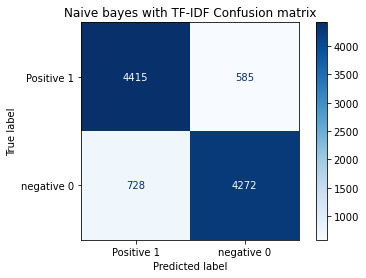

In [65]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

if __name__ == "__main__":

    # read dataset
    df = pd.read_csv(
        "/Users/salwaali/Desktop/BDOS/1 new/project/DS/IMDB Dataset.csv")

    # change the categorical variables map postive to 1 and negative to 0
    df.sentiment = df.sentiment.apply(
        lambda x: 1 if x == "positive" else 0)

    # kfold creat column and fill it with -1
    df["kfold"] = -1

    # randomly slecting rows or data from our dataset
    df = df.sample(frac=1).reset_index(drop=True)

    # fetch lables our target
    y = df.sentiment.values

    # for unbalanced dataset its better to use StratifiedKFoldwhich keeps the ration constant
    kf = model_selection.StratifiedKFold(n_splits=5)

    # fill kfold col
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f

    for fold_ in range(5):
        train_df = df[df.kfold != fold_].reset_index(drop=True)
        test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    
    def clean(s):
        s=s.split()
        s=" ".join(s)
        s=re.sub(f'[{re.escape(string.punctuation)}]', '', s)
        return s

    df.loc[:, "review"] = df.review.apply(clean)

    # init  tfidf_vec
    tfidf_vec=TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None)


    # fit on train DS
    tfidf_vec.fit(train_df.review)

    # transform DS
    xtrain = tfidf_vec.transform(train_df.review)
    xtest = tfidf_vec.transform(test_df.review)

    # model
    model4=naive_bayes.MultinomialNB(alpha=0.1)

    model4.fit(xtrain, train_df.sentiment)

    preds_4 = model4.predict(xtest)

    accuracy = metrics.accuracy_score(test_df.sentiment, preds_3)

    print(f"Fold: {fold_}")
    print(f"Accuracy: {accuracy}")
    print('F1 Score : ' + str(metrics.f1_score(test_df.sentiment ,preds_3)))

    print("")
    disp = metrics.plot_confusion_matrix(model4, xtest, test_df.sentiment,
                                 display_labels=['Positive 1', 'negative 0'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title('Naive bayes with TF-IDF Confusion matrix')
    plt.savefig('CM3.png')

# DL approach

### 1- first deal with the Dataset 


In [1]:
import torch 
import torch.nn as nn
import io
import torch
import numpy as np 
import pandas as pd
import tensorflow as tf
from sklearn import metrics

In [2]:
import pandas as pd
from sklearn import model_selection


if __name__ == "__main__":
    #read DS
    df=pd.read_csv("./DS/IMDB Dataset.csv")
    
    # change categorical variables to numbers
    df.sentiment=df.sentiment.apply(lambda x: 1 if x == "positive" else 0)
    
    # creat k-fold for cross validation by sampling data randomly 
    df["kfold"]=-1 
    df=df.sample(frac=1).reset_index(drop=True)
    
    #the target 
    y=df.sentiment.values
    
    #split 
    kf=model_selection.StratifiedKFold(n_splits=5)
    s = kf.split(X=df,y=y)
    #fill the final column with k number to which row belongs
    for f,(t_,v_) in enumerate (s):
        df.loc[v_,'kfold']=f
        
    #save new DS
    df.to_csv("./DS/new_df.csv",index=False)


### 2- Spliting the dataset to target and features then convert it to format acceptable by the model


In [3]:
class IMDBDataset:
    def __init__(self , reviews,targets):
        
        self.reviews=reviews
        self.target=targets
        
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review=self.reviews[item,:]
        target=self.target[item]
        
        return {
            'review': torch.tensor(review,dtype=torch.long),
            'target': torch.tensor(target,dtype=torch.float)
        }

### 3- The Model LSTM 

In [4]:
class LSTM(nn.Module):
    def __init__(self, embedding_matrix):
        
        super(LSTM, self).__init__()
        #specify of input for the pretrained 
        num_words = embedding_matrix.shape[0] #number of words
        embed_dim = embedding_matrix.shape[1] #dim of embbedding 
        
        #input layer used to store word embeddings and retrieve them using indices
        self.embedding = nn.Embedding(
            num_embeddings=num_words,
            embedding_dim=embed_dim)
        #convert matrix it to tensor
        self.embedding.weight = nn.Parameter(
            torch.tensor(embedding_matrix, dtype=torch.float32 ))
        
    
        # to prevent traing the embedding since i'm using pretrained embedding 
        self.embedding.weight.requires_grad = False
        
        ## hidden layer size 128
        self.lstm = nn.LSTM(embed_dim,128, bidirectional=True, batch_first=True,)
        # the output is positive 1  or negative 0 therefor one output layer
        self.out = nn.Linear(512, 1) # bi-direction = 256
        
    def forward(self, x):
        # pass the word through the pretrained embedding
        x = self.embedding(x)
        #then to lstm
        x, _ = self.lstm(x)
        #
        avg_pool = torch.mean(x, 1) 
        max_pool, _ = torch.max(x, 1)
        out = torch.cat((avg_pool, max_pool), 1)
        #
        out = self.out(out)
        return out

# 4- The Training and evaluation 

In [5]:
def train(data_loader, model, optimizer, device): 
    #load Data
    #call lstm model
    # optimize (Adam)
    model.train()
    for data in data_loader:
        reviews = data["review"] #feature
        targets = data["target"] #target
        
        #move the data 
        reviews = reviews.to(device,dtype=torch.long) 
        targets = targets.to(device,dtype=torch.float)
        
        optimizer.zero_grad()
        predictions = model(reviews)
        
        
        #the loss function here combines sigmoid layer and the Binary Cross Entropy 
        #between the target and the output
        loss = nn.BCEWithLogitsLoss()(predictions,targets.view(-1, 1))
        loss.backward()
        
        # the chosen optimizer is Adam 
        optimizer.step()
        
        
def evaluate(data_loader, model, device):
    final_predictions = []
    final_targets = []
    model.eval()
    #stopping the optimizer 
    with torch.no_grad():
        for data in data_loader:
            reviews = data["review"]
            targets = data["target"]  
            reviews = reviews.to(device, dtype=torch.long)
            targets = targets.to(device, dtype=torch.float)
            
            #predict the class
            predictions = model(reviews) 
            predictions = predictions.cpu().numpy().tolist() #move to save it
            targets = data["target"].cpu().numpy().tolist() 
            
            final_predictions.extend(predictions) 
            final_targets.extend(targets)
    return final_predictions, final_targets

### 5- start the training

In [6]:
MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 8
EPOCHS = 4

In [7]:
# word embedding i used pertained embedding which has a vector representing English word 
#2 million word vectors trained on Common Crawl (600B tokens)
#from https://fasttext.cc/docs/en/english-vectors.html 

#Read the pertained embedding
def load_vectors(fname):
    fin = io.open(fname,'r', encoding='utf-8',newline='\n',
                  errors='ignore')
    n, d = map(int, fin.readline().split()) 
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = list(map(float, tokens[1:])) 
    return data



#word:index value
#word:embedding vector
def create_embedding_matrix(word_index, embedding_dict): 
    embedding_matrix = np.zeros((len(word_index) + 1, 300)) #for english the vector representing the word is 300D
    
    #loop through our words and take its vector representation from the pertained embedding
    for word, i in word_index.items():
        if word in embedding_dict:
            embedding_matrix[i] = embedding_dict[word]
            
    return embedding_matrix


def run(df, fold): 
    train_df = df[df.kfold != fold].reset_index(drop=True) #training set
    valid_df = df[df.kfold == fold].reset_index(drop=True) # diffrent validation set
    
    print("Fitting tokenizer")
    
    # Preprocess the input text 
    tokenizer = tf.keras.preprocessing.text.Tokenizer() 
    tokenizer.fit_on_texts(df.review.values.tolist())
    
    xtrain = tokenizer.texts_to_sequences(train_df.review.values) # Give unique number to each word 
    xtest = tokenizer.texts_to_sequences(valid_df.review.values)
    
    
    #Zero padding 
    xtrain = tf.keras.preprocessing.sequence.pad_sequences(
        xtrain, maxlen=MAX_LEN ) 
    xtest = tf.keras.preprocessing.sequence.pad_sequences(
        xtest, maxlen=MAX_LEN)
    
    
    # Get the Dataset 
    train_dataset = IMDBDataset(
        reviews=xtrain,targets=train_df.sentiment.values)
    
    train_data_loader = torch.utils.data.DataLoader(
        train_dataset,batch_size=TRAIN_BATCH_SIZE, num_workers=2)
    
    valid_dataset = IMDBDataset(reviews=xtest,targets=valid_df.sentiment.values )
    
    valid_data_loader = torch.utils.data.DataLoader(
        valid_dataset,batch_size=VALID_BATCH_SIZE,num_workers=1)
    
    # pertained embedding
    print("Loading embeddings")
    embedding_dict = load_vectors("./DS/crawl-300d-2M.vec") 
    embedding_matrix = create_embedding_matrix(
        tokenizer.word_index, embedding_dict)
    
    # the training
    device = torch.device("cpu")
    model = LSTM(embedding_matrix)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    print("Training Model")
    
    best_accuracy = 0
    early_stopping_counter = 0
    
    for epoch in range(EPOCHS):
        train(train_data_loader, model, optimizer, device)
        outputs, targets = evaluate(
            valid_data_loader, model, device)
        
        # threshold
        outputs = np.array(outputs) >= 0.5
        accuracy = metrics.accuracy_score(targets, outputs) 
        print(f"FOLD:{fold}, Epoch: {epoch}, Accuracy Score = {accuracy}")
        
        
        #save the best accuracy to early stop 
        if accuracy > best_accuracy: 
            best_accuracy = accuracy
        else:
            early_stopping_counter += 1
        if early_stopping_counter > 2: 
            break

# Run the code

In [9]:
if __name__ == "__main__": 
    df = pd.read_csv("./DS/new_df.csv")
    run(df, fold=0) 
    run(df, fold=1) 
    run(df, fold=2) 
    run(df, fold=3) 
    run(df, fold=4)

Fitting tokenizer
Loading embeddings
Training Model
FOLD:0, Epoch: 0, Accuracy Score = 0.8738
FOLD:0, Epoch: 1, Accuracy Score = 0.8948
FOLD:0, Epoch: 2, Accuracy Score = 0.8977
FOLD:0, Epoch: 3, Accuracy Score = 0.8991
Fitting tokenizer
Loading embeddings
Training Model
FOLD:1, Epoch: 0, Accuracy Score = 0.8844
FOLD:1, Epoch: 1, Accuracy Score = 0.9001
FOLD:1, Epoch: 2, Accuracy Score = 0.9022
FOLD:1, Epoch: 3, Accuracy Score = 0.9018
Fitting tokenizer
Loading embeddings
Training Model
FOLD:2, Epoch: 0, Accuracy Score = 0.873
FOLD:2, Epoch: 1, Accuracy Score = 0.8954
FOLD:2, Epoch: 2, Accuracy Score = 0.9029
FOLD:2, Epoch: 3, Accuracy Score = 0.9041
Fitting tokenizer
Loading embeddings
Training Model
FOLD:3, Epoch: 0, Accuracy Score = 0.8677
FOLD:3, Epoch: 1, Accuracy Score = 0.891
FOLD:3, Epoch: 2, Accuracy Score = 0.8979
FOLD:3, Epoch: 3, Accuracy Score = 0.8986
Fitting tokenizer
Loading embeddings
Training Model
FOLD:4, Epoch: 0, Accuracy Score = 0.8815
FOLD:4, Epoch: 1, Accuracy S